In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
# Basic URL and KEY
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Initalizing Lats and Lngs Variable
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Creating the coordinates Variable while unpacking the zip
coordinates = list(lat_lngs)

In [4]:
# Create the empty city List
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Make an API request for each city 
    try:
       
        # Parse the JSON data
        city_weather = requests.get(city_url).json()

        # Compile needed data
        city_city = city.title()
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_hum = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']

        # Fill City Data list 
        city_data.append({"City": city_city,
                         "Country": city_country,
                         "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_hum,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         })
    #If an error occurs
    except: 
        print("City not found. Skipping")
        pass

# Complete Data Retrieval    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | mangaratiba
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | tutoia
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | hambantota
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | kiunga
Processing Record 13 of Set 1 | san andres
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping
Processing Record 15 of Set 1 | grand river south east
City not found. Skipping
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | salalah
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | shache
P

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2022-02-12 19:13:53,-33.0153,27.9116,77.43,86,0,12.86
1,Mangaratiba,BR,2022-02-12 19:13:10,-22.9597,-44.0406,81.03,85,68,4.29
2,Arraial Do Cabo,BR,2022-02-12 19:12:43,-22.9661,-42.0278,80.46,69,75,8.05
3,Tutoia,BR,2022-02-12 19:17:08,-2.7619,-42.2744,85.98,70,23,11.79
4,Castro,BR,2022-02-12 19:12:42,-24.7911,-50.0119,80.06,44,17,1.99
5,Carnarvon,AU,2022-02-12 19:11:06,-24.8667,113.6333,82.47,61,100,8.05
6,Clyde River,CA,2022-02-12 19:09:08,70.4692,-68.5914,-14.82,90,100,23.73
7,Hambantota,LK,2022-02-12 19:17:09,6.1241,81.1185,76.44,85,100,9.86
8,Ushuaia,AR,2022-02-12 19:13:12,-54.8000,-68.3000,47.86,53,40,37.98
9,Busselton,AU,2022-02-12 19:14:28,-33.6500,115.3333,56.08,74,0,12.41


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

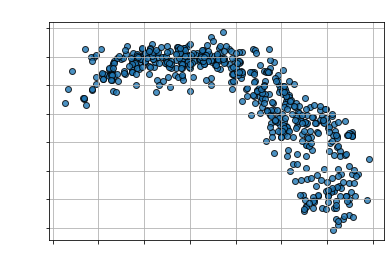

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"),c="white")
plt.ylabel("Max Temperature (F)",c="white")
plt.xlabel("Latitude",c="white")
plt.xticks(c="white")
plt.yticks(c="white")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

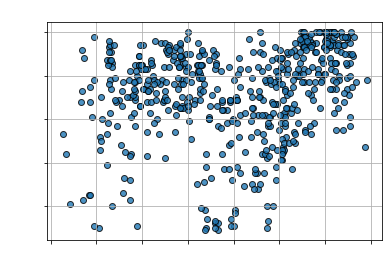

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"),c="white")
plt.ylabel("Humidity (%)",c="white")
plt.xlabel("Latitude",c="white")
plt.xticks(c="white")
plt.yticks(c="white")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

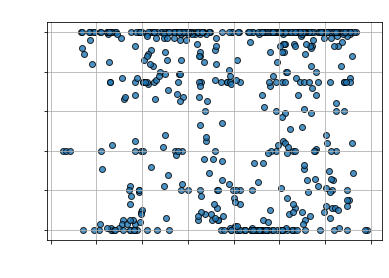

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"),c="white")
plt.ylabel("Cloudiness (%)",c="white")
plt.xlabel("Latitude",c="white")
plt.xticks(c="white")
plt.yticks(c="white")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

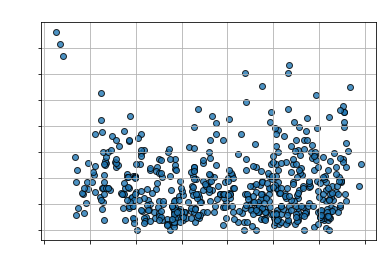

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"),c="white")
plt.ylabel("Wind Speed (mph)",c="white")
plt.xlabel("Latitude",c="white")
plt.xticks(c="white")
plt.yticks(c="white")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()